# Extract data from output files

### Code to extract timing information from output files of Lbann code
March 9, 2020

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import subprocess as sp
import os
import glob
import itertools

from ipywidgets import interact, interact_manual,fixed, SelectMultiple, RadioButtons

## Extract training times

In [2]:
def f_extract_info(fname):
    '''
    Module to extract information from out.log files of Lbann training
    Reads in file name
    '''
    strg_lst=['objective','d_real','d_fake','gen','run time','mini-batch']
    keys=['training_'+strg for strg in strg_lst]
    dict1={}
    for category in ['training','validation']:
        for strg in strg_lst:
            key=category+'_'+strg
            cmd='grep "{0}" {1} | grep "{2}"'.format(category,fname,strg)
    #         print(cmd)
            op1=sp.check_output(cmd,shell=True).decode('utf-8').split('\n')
            obj=np.array([strg.split(':')[-1] for strg in op1 if strg])
            dict1[key]=obj
    
    df=pd.DataFrame([])
    key_lst=['training_objective', 'training_d_real', 'training_d_fake', 'training_gen', 'validation_objective', 'validation_d_real', 'validation_d_fake', 'validation_gen']
    col_list=['train_obj','train_dreal','train_dfake','train_gen','val_obj','val_dreal','val_dfake','val_gen']
    for col,key in zip(col_list,key_lst):
        df[col]=dict1[key].astype(np.float)

    ### Need to remove the trailing 's' in the timings
    for col,key in zip(['train_time','val_time'],['training_run time','validation_run time']):
        df[col]=np.array([i[:-1] for i in dict1[key]]).astype(np.float)

    for col,key in zip(['train_batch_stats','val_batch_stats'],['training_mini-batch','validation_mini-batch']):
        df[col]=dict1[key]
        
    return df

In [11]:
fname='/global/cfs/cdirs/m3363/vayyar/cosmogan_data/results_data/20200331_131011_exagan/slurm-513349.out'
df=f_extract_info(fname)

In [9]:
df.columns
df.head()
# col_list=['train_obj', 'train_dreal', 'train_dfake', 'train_gen', 'val_obj', 'val_dreal', 'val_dfake', 'val_gen', 'train_time', 'val_time']
# df[col_list]

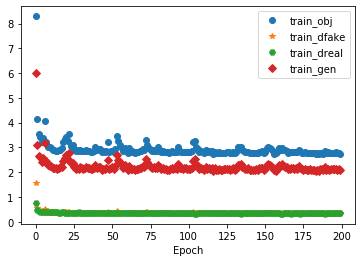

In [10]:
def f_plot(df,col_list=['train_obj']):
    '''
    Plot multiple columns of the dataframe
    '''
    plt.figure()
    
    marker_lst=('o','*','H','D','.','x')
    marker=itertools.cycle(marker_lst)
    for col in col_list: plt.plot(df[col],linestyle='',marker=next(marker),label=col)
    plt.legend()
    plt.xlabel('Epoch')

f_plot(df,col_list=['train_obj','train_dfake','train_dreal','train_gen'])

# plt.savefig('fig2.png')

In [52]:
df=df_list[0]
col_list=['train_obj', 'train_dreal', 'train_dfake', 'train_gen', 'val_obj',
       'val_dreal', 'val_dfake', 'val_gen', 'train_time', 'val_time']
interact_manual(f_plot,col_list=SelectMultiple(options=col_list),df=fixed(df))


interactive(children=(SelectMultiple(description='col_list', options=('train_obj', 'train_dreal', 'train_dfake…

<function __main__.f_plot(df, col_list=['train_obj'])>